### visualize lateral fluxes and extract simplest form for Susan

##### Notebook adapted from BOB_big-old-budget
    
   


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
from cmocean import cm
import pandas as pd

import pickle
import netCDF4 as nc
import glob
from decimal import Decimal


%matplotlib inline
plt.rcParams['font.size'] = 11

import warnings
warnings.simplefilter('ignore')

In [21]:
# #this code copies just the variables we need

# start ='2017-01-01'
# end ='2017-12-31'

# dayslen = 365
# w = nc.Dataset(f'NEWBUDGETVARS_RIVTA5_{start}-{end}.nc')

# fn = f'Lateral_DIC_fluxes_RIVTA5_01jan17-31dec17.nc'
# ds = nc.Dataset(fn, 'w', format='NETCDF4')

# days = ds.createDimension('days', dayslen)
# vol_km3_tot_ar_nc = ds.createVariable('JDF_DIC_into_domain_mmol_day', 'f4', ('days',))
# vol_km3_tot_ar_nc[:] = w['DIC_ATX_mmol_day_pos_ar'][:]
# vol_km3_tot_ar_nc = ds.createVariable('JDF_DIC_outof_domain_mmol_day', 'f4', ('days',))
# vol_km3_tot_ar_nc[:] = w['DIC_ATX_mmol_day_neg_ar'][:]
# vol_km3_tot_ar_nc = ds.createVariable('JS_DIC_into_domain_mmol_day', 'f4', ('days',))
# vol_km3_tot_ar_nc[:] = w['DIC_ATY_mmol_day_pos_ar'][:]
# vol_km3_tot_ar_nc = ds.createVariable('JS_DIC_outof_domain_mmol_day', 'f4', ('days',))
# vol_km3_tot_ar_nc[:] = w['DIC_ATY_mmol_day_neg_ar'][:]

# ds.close()

Text(0.5, 0, 'DOY')

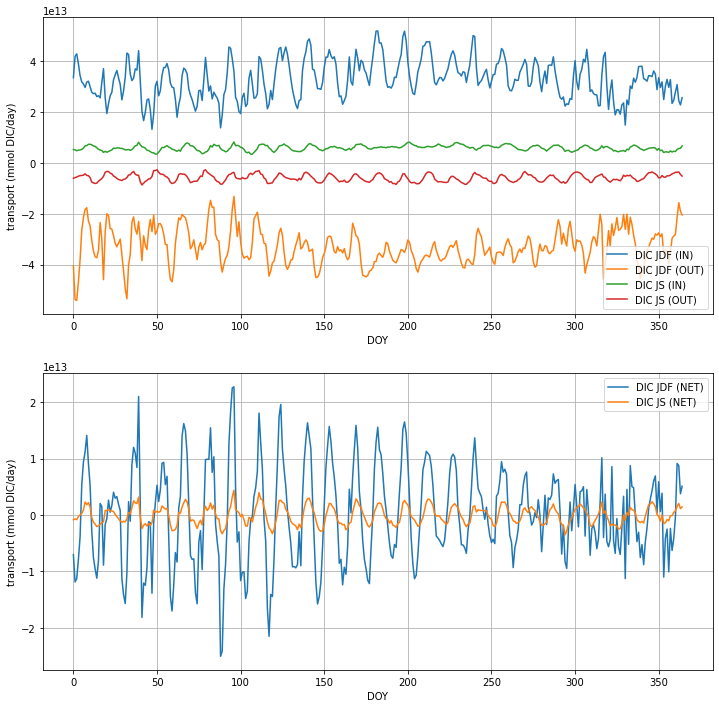

In [31]:
w = nc.Dataset('Lateral_DIC_fluxes_RIVTA5_01jan17-31dec17.nc')
#print(w['JDF_DIC_into_domain_mmol_day'][:])

# <class 'netCDF4._netCDF4.Dataset'>
# root group (NETCDF4 data model, file format HDF5):
#     dimensions(sizes): days(365)
#     variables(dimensions): float32 JDF_DIC_into_domain_mmol_day(days), float32 JDF_DIC_outof_domain_mmol_day(days), float32 JS_DIC_into_domain_mmol_day(days), float32 JS_DIC_outof_domain_mmol_day(days)
#     groups: 

dayslen = np.arange(0,365,1)
fact = 0.6
fig, axs = plt.subplots(2,1, figsize=(20*fact, 20*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(dayslen,w['JDF_DIC_into_domain_mmol_day'][:], label = 'DIC JDF (IN)')
axs[0].plot(dayslen,w['JDF_DIC_outof_domain_mmol_day'][:], label = 'DIC JDF (OUT)')
axs[0].plot(dayslen,w['JS_DIC_into_domain_mmol_day'][:], label = 'DIC JS (IN)')
axs[0].plot(dayslen,w['JS_DIC_outof_domain_mmol_day'][:], label = 'DIC JS (OUT)')
axs[0].grid()
axs[0].legend()

axs[1].plot(dayslen,w['JDF_DIC_into_domain_mmol_day'][:]+\
             w['JDF_DIC_outof_domain_mmol_day'][:], \
             label = 'DIC JDF (NET)')
axs[1].plot(dayslen,w['JS_DIC_into_domain_mmol_day'][:]+\
             w['JS_DIC_outof_domain_mmol_day'][:], \
             label = 'DIC JS (NET)')
axs[1].grid()
axs[1].legend()

axs[0].set_ylabel('transport (mmol DIC/day)')
axs[1].set_ylabel('transport (mmol DIC/day)')

axs[0].set_xlabel('DOY')
axs[1].set_xlabel('DOY')